# PyGMT 練習帳

 [GMT](https://www.generic-mapping-tools.org/) のPython wrapper である [pygmt](https://www.pygmt.org/) の地震学研究者向けチュートリアル．
 
網羅的に書いているわけではないので，GMTの基本的な利用方法を知っている人でないとわかりにくいかもしれません．

## PyGMTのインストール

Anacondaの場合

```bash
$ conda install pygmt -c conda-forge
```

pipの場合

```bash
$ pip install pygmt
```

環境にGMTがインストールされていることも必要（たぶん）．

## 準備：モジュールの読み込み

モジュール単独だけで，numpyやmatplotlibを別途importせずともちゃんと動作する．

In [2]:
import pygmt

- データハンドリングや比較プロットのため， `numpy`と`ObsPy` も入れておく
- その他画像比較のための Image モジュールを利用

In [1]:
import numpy as np
import obspy
from IPython.display import Image

## pygmtによる作図の基本

作図の流れは

```
fig = pygmt.Figure()
```
で図のオブジェクトを作成し，GMTのコマンドに相当する
```
fig.XXXXX()
```
を重ねていくことで作図する．最後に
```
fig.show()
```
とすればJupyter上に表示されるし，
```
fig.savefig(filename)
```
とすると`filename`の拡張子に応じて画像として保存される．

## 基本の地図

`gmt pscoast` に相当する地図を作図してみる．

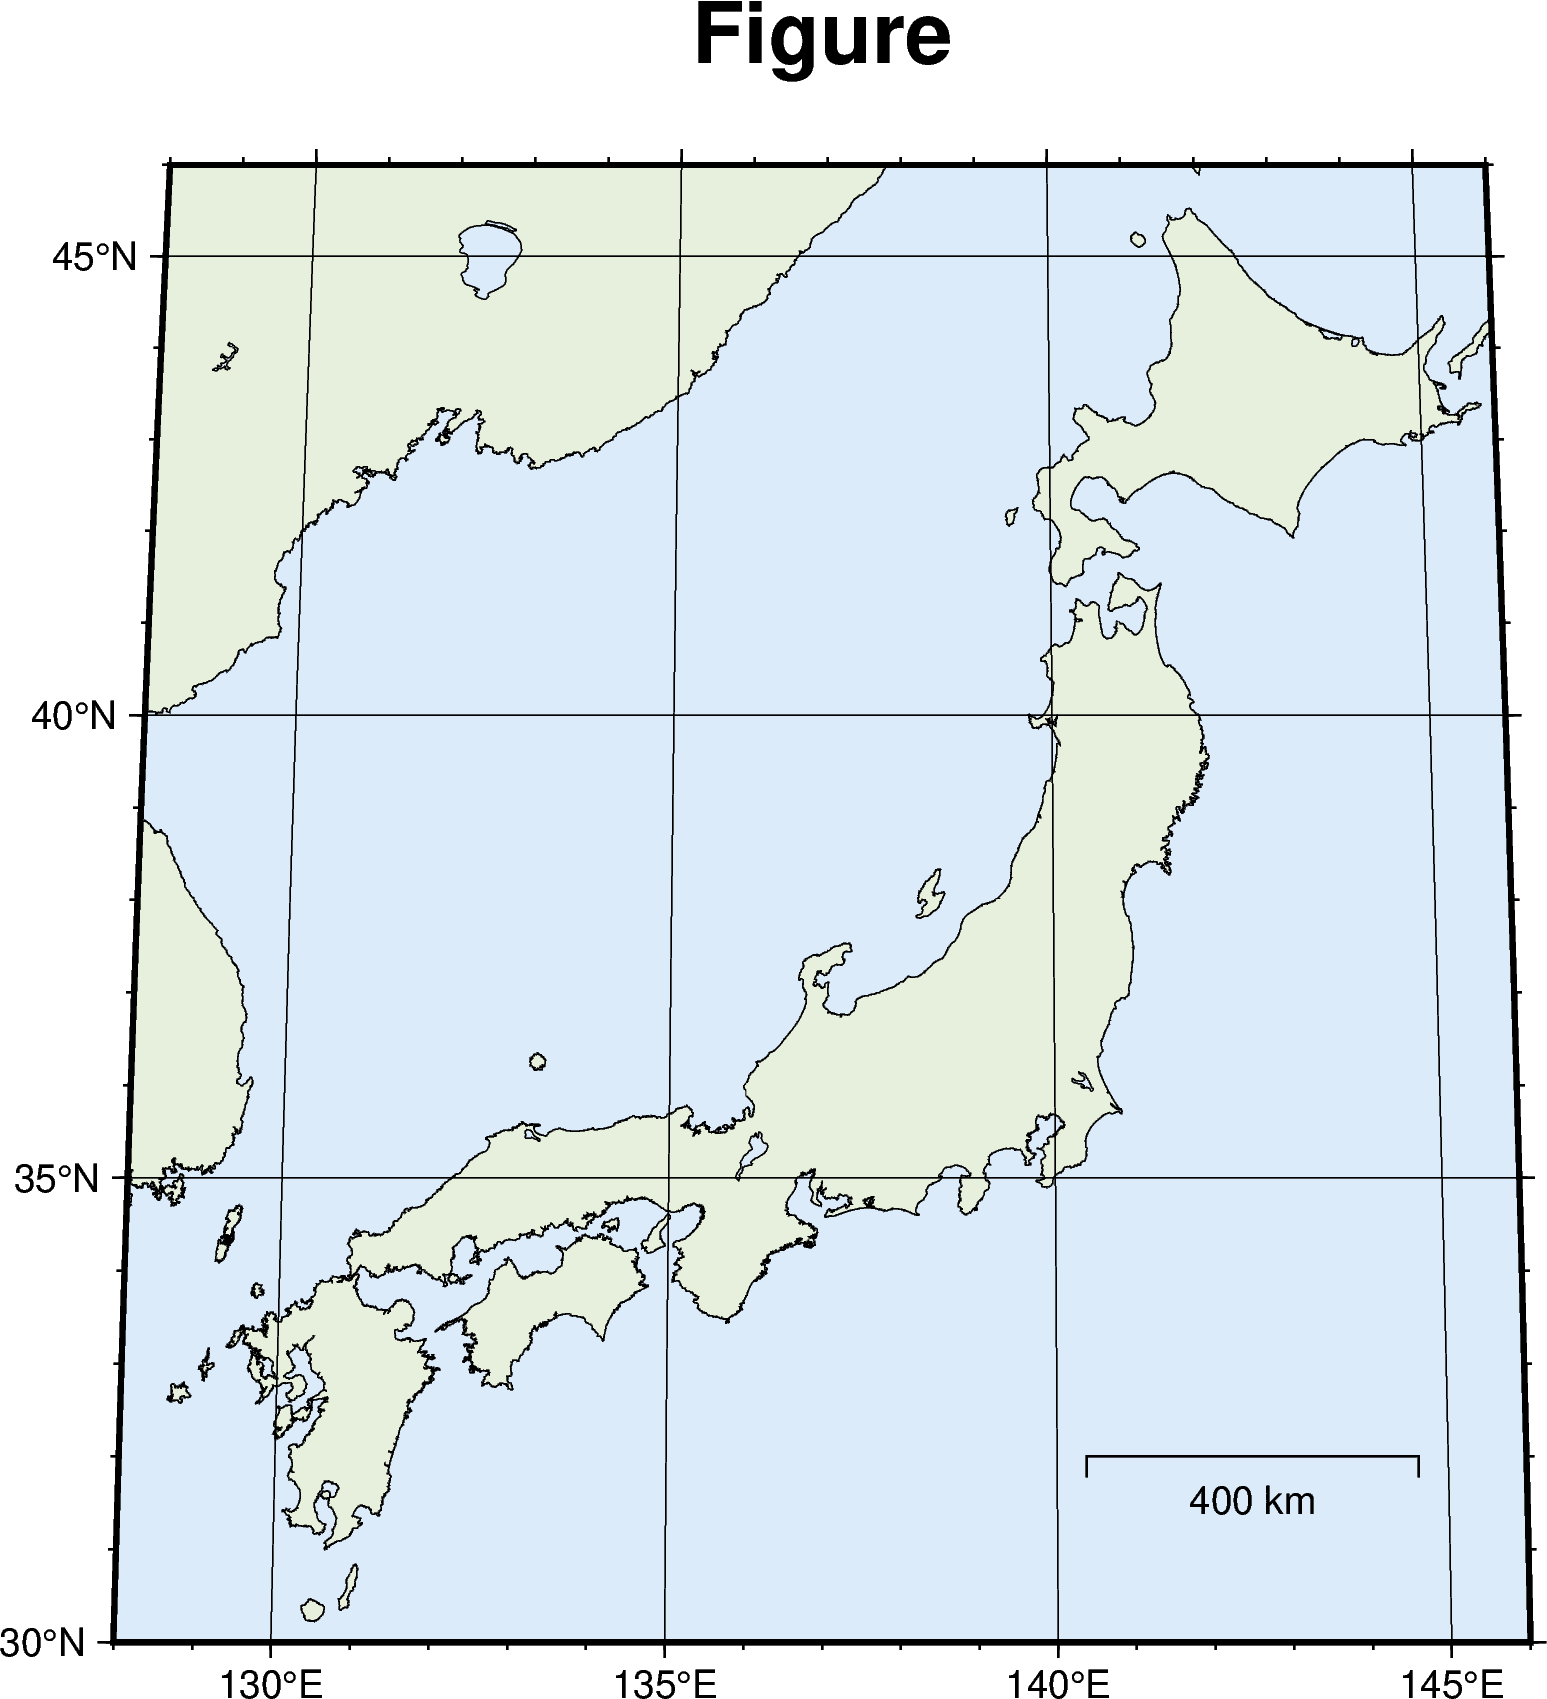

In [20]:
fig = pygmt.Figure()

fig.coast(
    projection  = 'N138/12c',                         # 投影法とサイズ．メルカトルなら 'M12c' など．
    region      = (128, 146, 30, 46),                 # 領域はリストかタプルで与える．
    shorelines  = 'default,black',                    # 海岸線のペンの設定．
    area_thresh = 100,                                # 細かい領域の描画下限 (km^2)
    resolution  = 'f',                                # 'c', 'l', 'i', 'h', 'f' の順に高くなる
    land        = '230/240/220',                      # 陸地の色
    water       = '220/235/250',                      # 水の色
    map_scale   = '142.5/32/32/400',                  # 距離スケールの水平・縦位置と距離サイズ
    frame       = ['WSen+t"Figure"', 'xafg', 'yafg']  # 南西に軸名・タイトル指定（+t) およびXY方向それぞれの軸情報
)

fig.show()
fig.savefig('fig/pygmt-coastline.png')                # show=Trueオプションをつけるとビューワが開く


オプションはPythonシェル（IPythonやJupyter Notebookなど）で `help(fig.coast)` そすれば表示される．

上記の例では `fig.coast` ひとつですべてを描画したが，軸の描画を `fig.basemap` に任せることもできる：

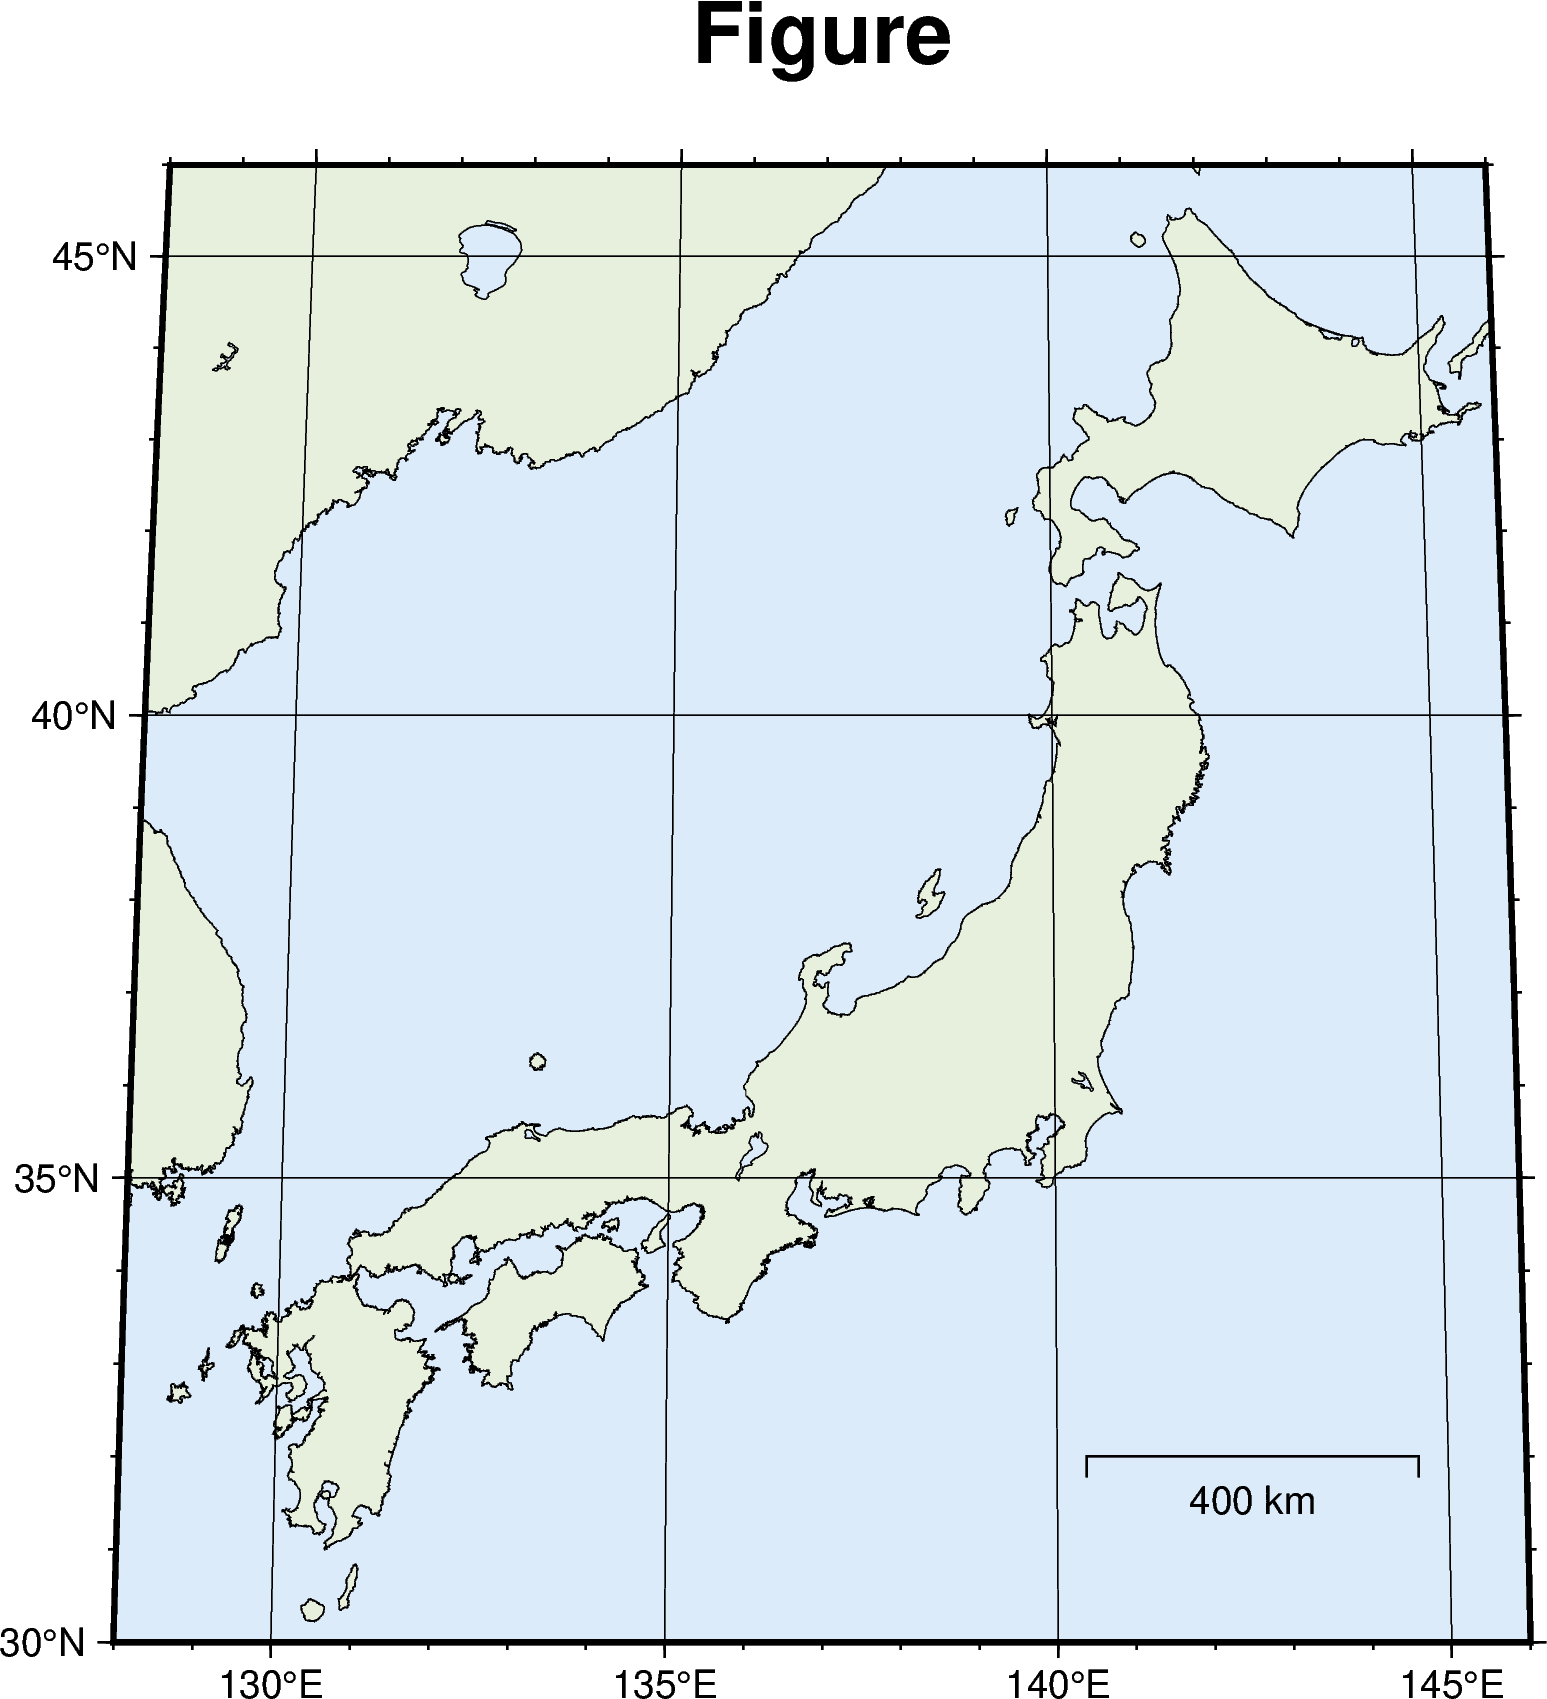

In [23]:
fig = pygmt.Figure()


fig.coast(
    projection  = 'N138/12c',          
    region      = (128, 146, 30, 46),  
    shorelines  = 'default,black',     
    area_thresh = 100,                 
    resolution  = 'f',                 
    land        = '230/240/220',       
    water       = '220/235/250',       
    map_scale   = '142.5/32/32/400',   
)

fig.basemap(
    frame       = ['WSen+t"Figure"', 'xafg', 'yafg'] 
)

fig.show()


### エイリアス

従来のGMTと比べてオプションの意味がわかりやすい．一方，昔からのGMTのオプション名を把握している筆者のような古代人向け（？）に，従来オプション名のエイリアスも設定されている．たとえば先程の地図は以下のように作成することもできる．初めて見る人には全く意味不明のオプションだろうが，GMTに馴染みのある人にはむしろ使いやすいかもしれない．

/var/folders/lp/t_ckblrj2pg2ygt_dwg3sx0r0009rj/T/ipykernel_83444/605710792.py:3: SyntaxWarning: Short-form parameter (R) is not recommended. Use long-form parameter 'region' instead.
  fig.coast(
/var/folders/lp/t_ckblrj2pg2ygt_dwg3sx0r0009rj/T/ipykernel_83444/605710792.py:3: SyntaxWarning: Short-form parameter (J) is not recommended. Use long-form parameter 'projection' instead.
  fig.coast(
/var/folders/lp/t_ckblrj2pg2ygt_dwg3sx0r0009rj/T/ipykernel_83444/605710792.py:3: SyntaxWarning: Short-form parameter (A) is not recommended. Use long-form parameter 'area_thresh' instead.
  fig.coast(
/var/folders/lp/t_ckblrj2pg2ygt_dwg3sx0r0009rj/T/ipykernel_83444/605710792.py:3: SyntaxWarning: Short-form parameter (B) is not recommended. Use long-form parameter 'frame' instead.
  fig.coast(
/var/folders/lp/t_ckblrj2pg2ygt_dwg3sx0r0009rj/T/ipykernel_83444/605710792.py:3: SyntaxWarning: Short-form parameter (D) is not recommended. Use long-form parameter 'resolution' instead.
  fig.coast(
/var/fol

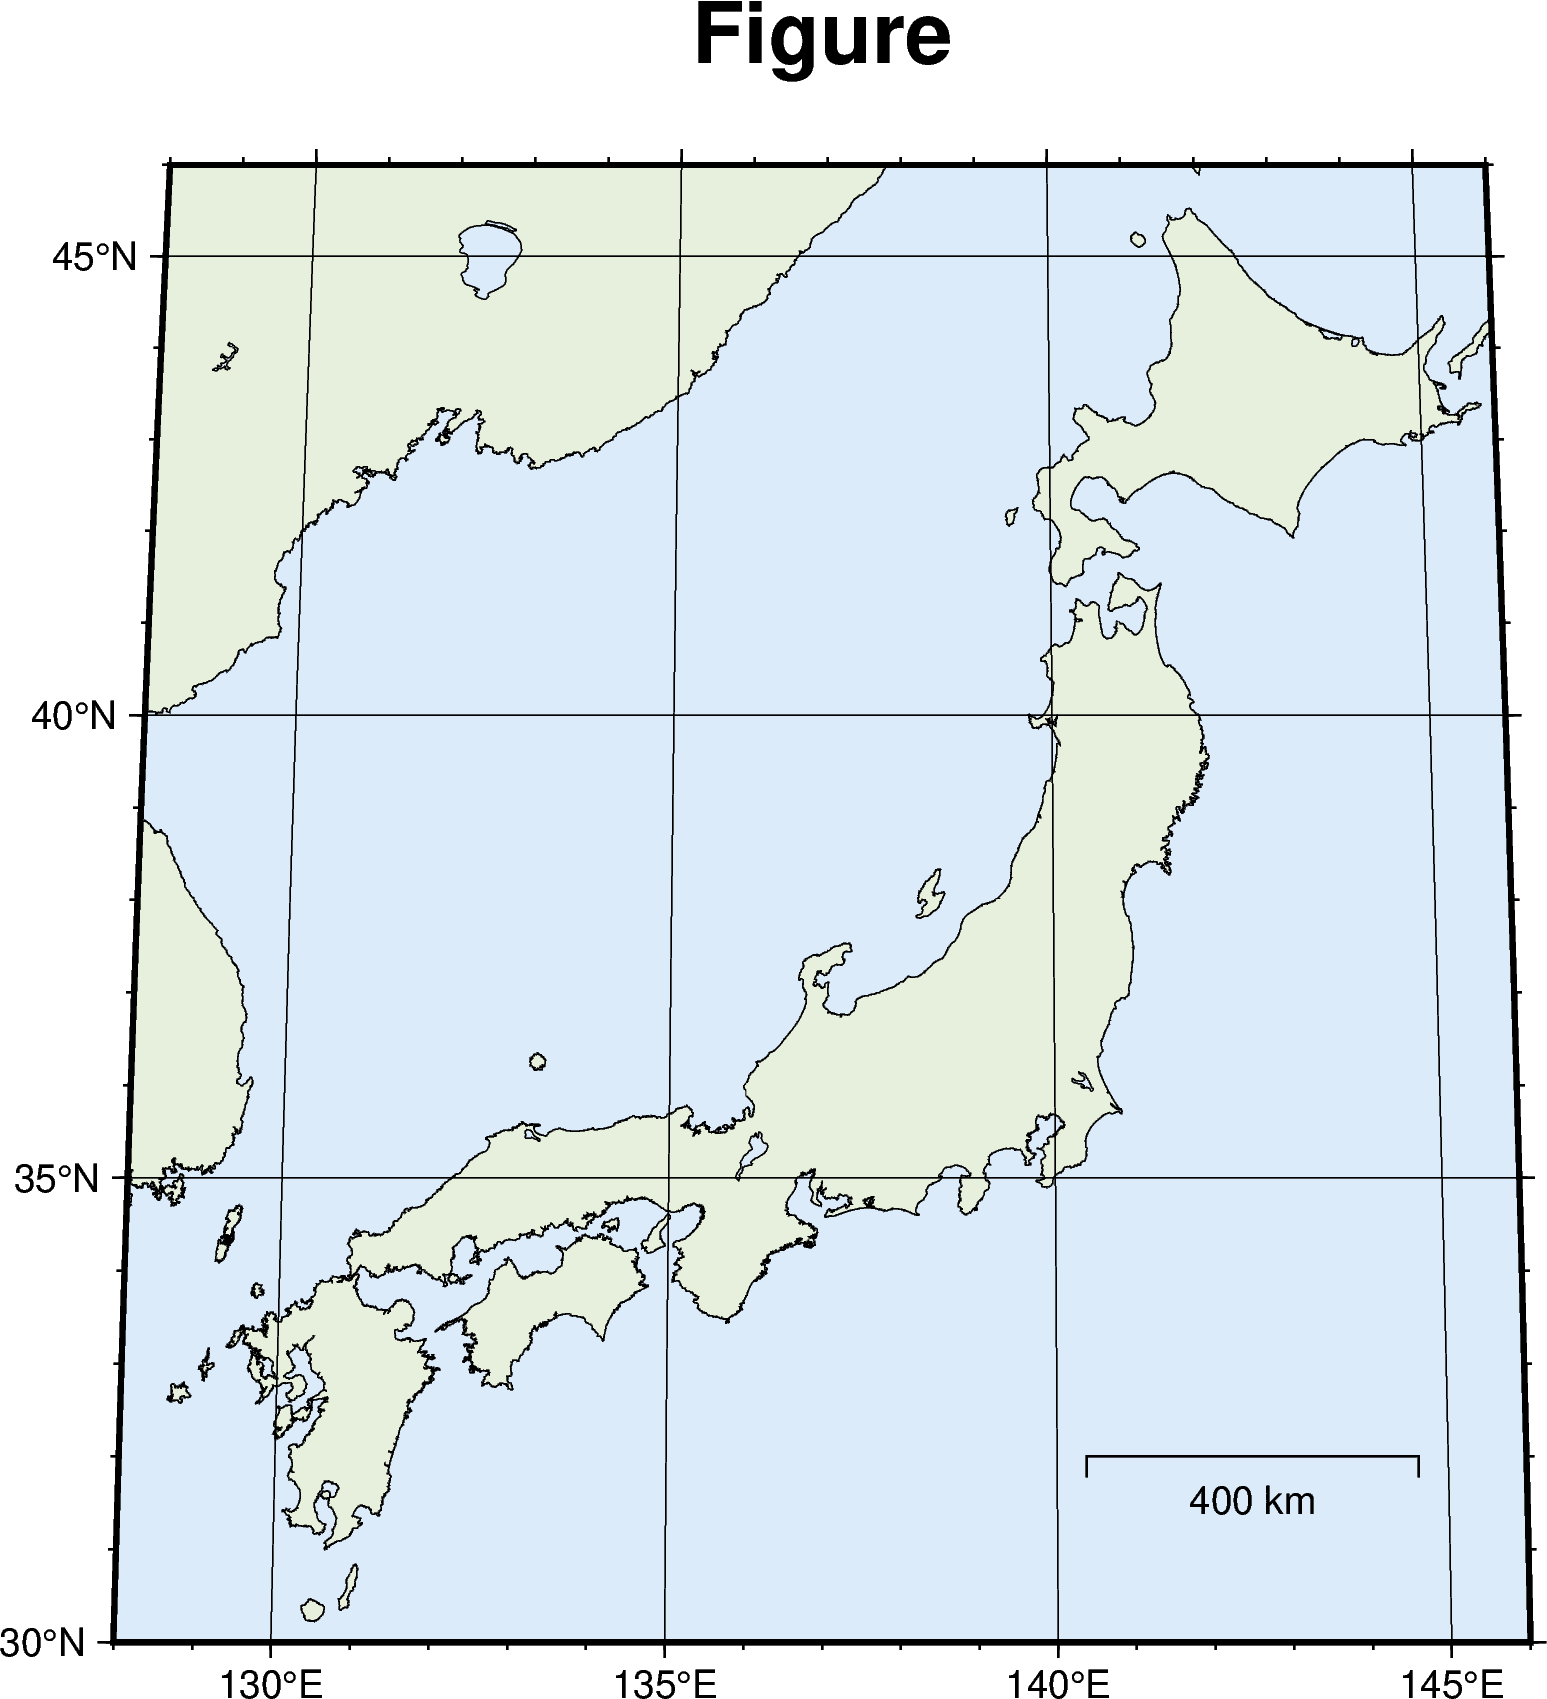

In [5]:
fig = pygmt.Figure()

fig.coast(
    J = 'N138/12c',                        
    R = (128, 146, 30, 46),                
    W = 'default,black',                   
    A = 100,                               
    D = 'f',                               
    G = '230/240/220',                     
    S = '220/235/250',                     
    L = '142.5/32/32/400',                 
    B = ['WSen+t"Figure"', 'xafg', 'yafg'] 
)

fig.show()

オプション名のエイリアスなので当然だが，全く同じ画像をつくることができる．ただし，
```text
SyntaxWarning: Short-form parameter (R) is not recommended. 
               Use long-form parameter 'region' instead.
```
のような警告がたくさん出て，自分が時代に取り残されていることを実感させられる（？）．

```{tip}

従来のGMTユーザーは，まず自分の知っている short-form オプションでpygmtを動かしてみて，
そこで表示される `SyntaxWarning` を見て現代的な long-form parameter 名を調べる
ようにすると，ドキュメントを引く手間が省けてよいかもしれない．

```

### 従来型のGMTスクリプトとの比較

同じ地図は，クラシックな GMT `bash` シェルスクリプトによって以下のように作図される．
次の入力にある `%%bash` は **bash magic** と呼ばれるもので，Jupyter Notebookでbashを実行するもの．同じセル内に書かれたものは `bash` により実行される．

In [27]:
%%bash

# 海岸線と枠を描画
gmt pscoast -JN138/12c -R128/146/30/46 -Wdefault,black -A100 -Df \
    -G230/240/220 -S220/235/250 -L142.5/32/32/400 -BWSen+t"Figure" -Bxafg -Byafg \
    > fig/classic-coastline.ps

# Postscript画像をPNGに変換
gmt psconvert -Tg -A -P -Qg2 -Qt2 fig/classic-coastline.ps

# 不要な中間生成物であるPostscriptを削除
rm -f fig/classic-coastline.ps

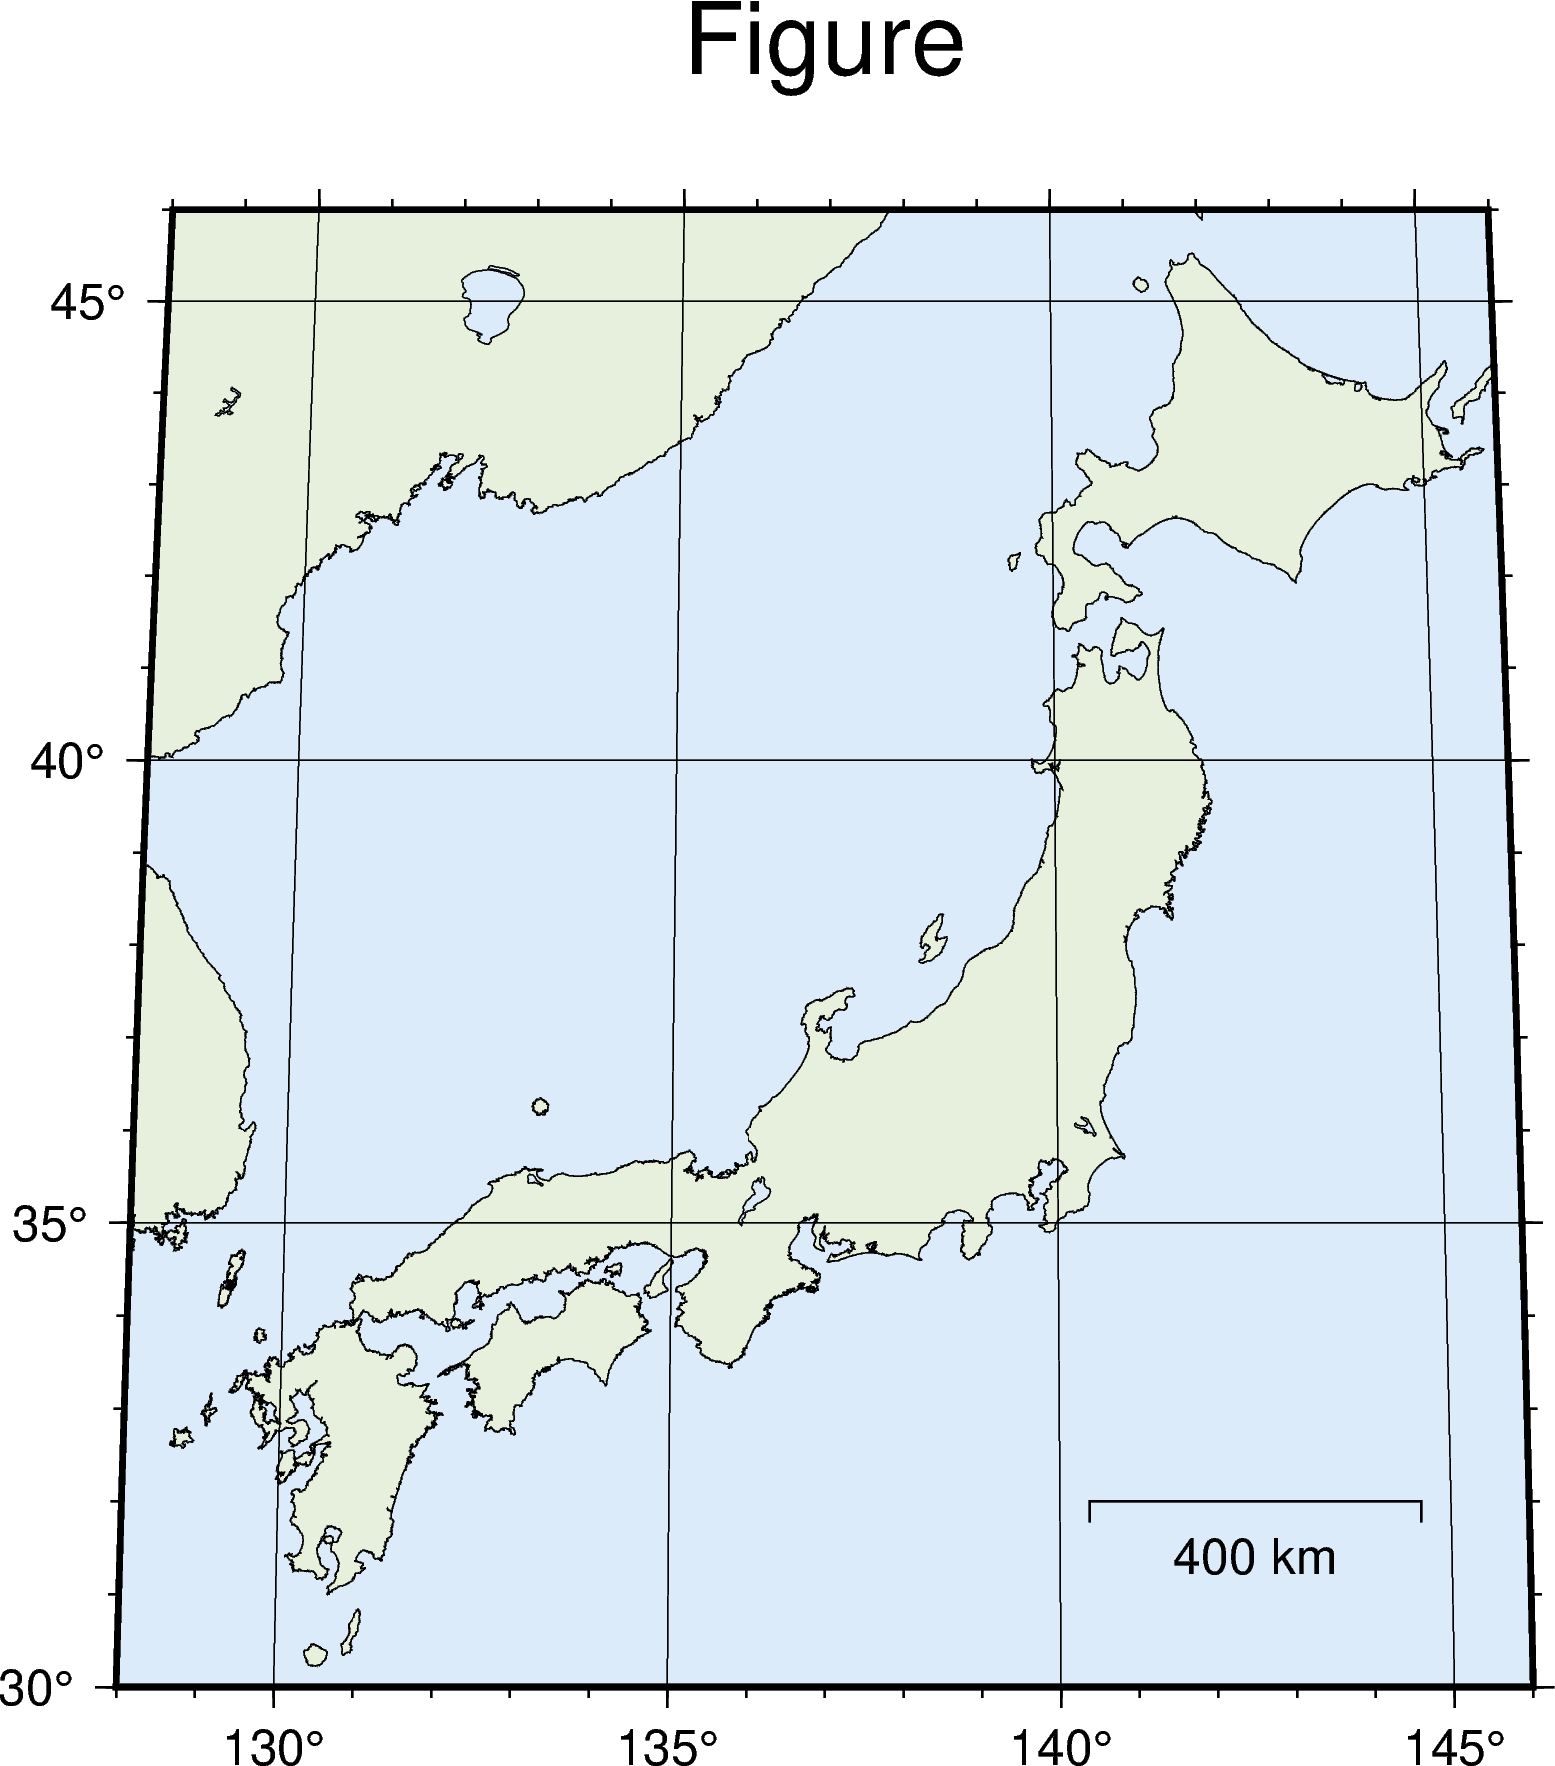

In [28]:
Image('fig/classic-coastline.png', width="60%")

ほぼ同じ画像が生成されたが，フォントサイズや緯度経度の単位（degree-E/degree-N）の有無，タイトルのフォントなどが微妙に異なる．これらは `gmt default` コマンドで調整可能なものである．

ちなみにGMT6の新しいmodern modeを使うと以下のようにも書ける．

In [29]:
%%bash

gmt begin fig/modern-coastline png
    gmt coast \
        -JN138/12c -R128/146/30/46 -Wdefault,black -A100 -Df \
        -G230/240/220 -S220/235/250 -L142.5/32/32/400 \
        -BWSen+t"Figure" -Bxafg -Byafg 
gmt end

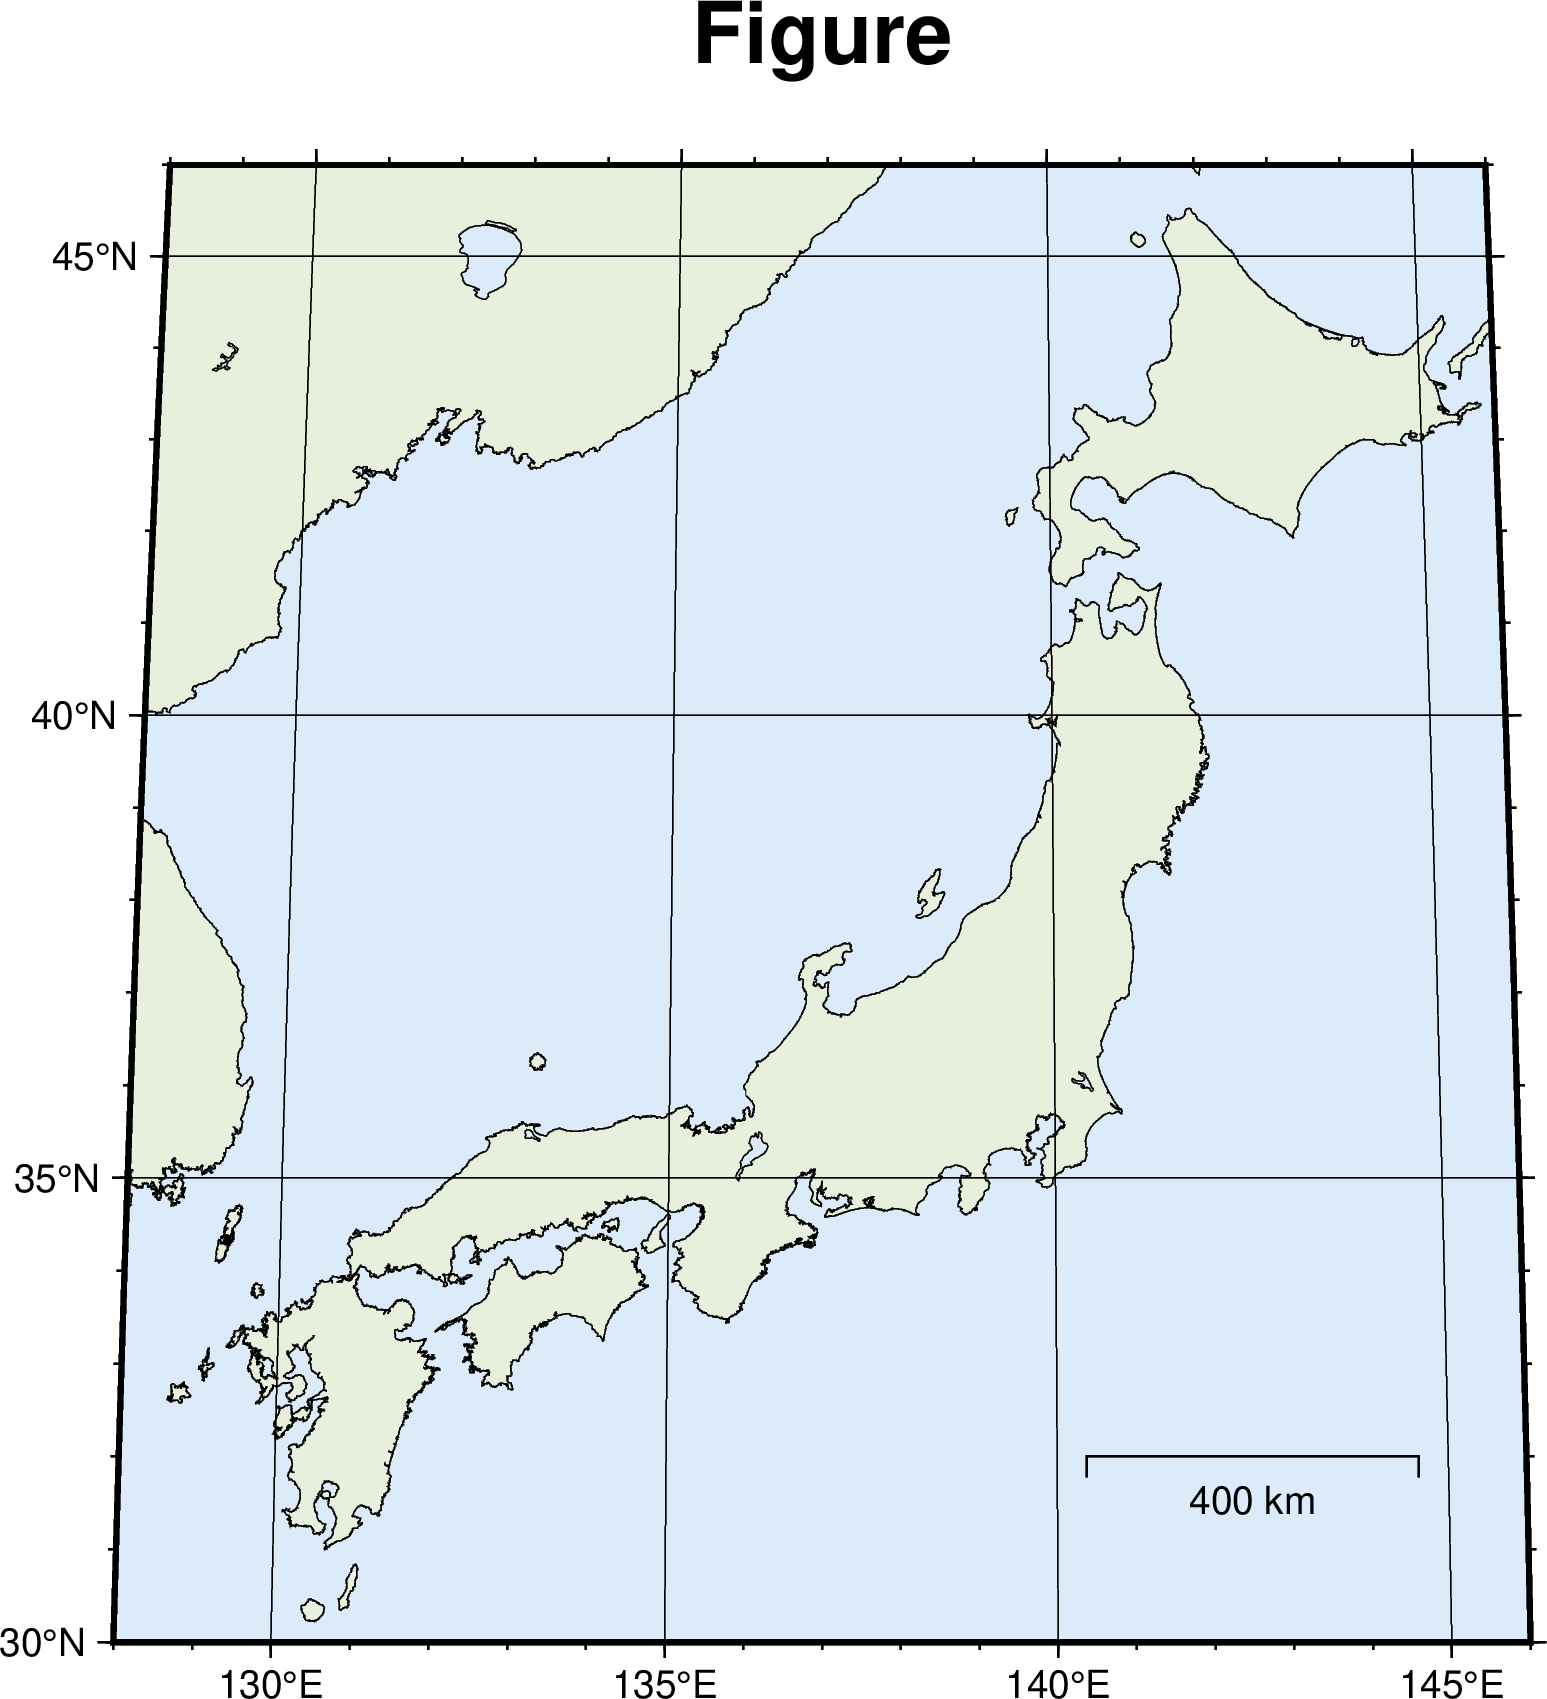

In [30]:
Image('fig/modern-coastline.png', width="60%")

こちらは `pygmt` とほぼ完全に同じ絵が出力された．`pygmt` はGMT modern modeのラッパーとして動作しているものと想像される．

### pygmtとシェルスクリプトの比較

これまでに紹介した（ほとんど）同じ図を出力するGMTスクリプトを4種類比較してみる．タブをクリックするとコードが表示される．比較しやすいようできるだけ改行を多めにしている．

````{tabbed} pygmt long

```python
fig = pygmt.Figure()

fig.coast(
    projection  = 'N138/12c',
    region      = (128, 146, 30, 46),
    shorelines  = 'default,black',
    area_thresh = 100,
    resolution  = 'f',
    land        = '230/240/220',
    water       = '220/235/250',
    map_scale   = '142.5/32/32/400',
    frame       = ['WSen+t"Figure"', 'xafg', 'yafg']
)
```
````
````{tabbed} pygmt short
```python
fig = pygmt.Figure()

fig.coast(
    J = 'N138/12c',                        
    R = (128, 146, 30, 46),                
    W = 'default,black',                   
    A = 100,                               
    D = 'f',                               
    G = '230/240/220',                     
    S = '220/235/250',                     
    L = '142.5/32/32/400',                 
    B = ['WSen+t"Figure"', 'xafg', 'yafg'] 
)
```
````
````{tabbed} bash classic
```bash
#!/bin/bash

gmt pscoast -JN138/12c \
            -R128/146/30/46 \
            -Wdefault,black \
            -A100 \
            -Df \
            -G230/240/220 \
            -S220/235/250 \
            -L142.5/32/32/400 \
            -BWSen+t"Figure" -Bxafg -Byafg \
> fig/classic-coastline.ps

gmt psconvert -Tg -A -P -Qg2 -Qt2 fig/classic-coastline.ps

rm -f fig/classic-coastline.ps
```
````
````{tabbed} bash modern
```bash
#!/bin/bash

gmt begin fig/modern-coastline png

    gmt coast \
        -JN138/12c \
        -R128/146/30/46 \
        -Wdefault,black \
        -A100 \
        -Df \
        -G230/240/220 \
        -S220/235/250 \
        -L142.5/32/32/400 \
        -BWSen+t"Figure" -Bxafg -Byafg 
        
gmt end
```
````

このような単一のコマンドからなるスクリプトではあまり差が大きくないが，コードの可読性は一番左のpygmt long optionがもっとも高いであろう．また，pygmtとGMT6 modern modeでは複数のGMTコマンドを用いる図においてミスを犯しやすい `-O` と `-K` オプションが不要であったり，現代では直接用いることはあまりない（と思われる）Postscriptファイルから他形式に変換する手間が省けている．

## 地図上への情報描画

### データの準備

pygmtが用意しているexampleデータに日本列島周辺の地震があるのでそれを用いる．

In [14]:
data = pygmt.datasets.load_japan_quakes()

上記コマンドはデモンストレーション用のデータセットである．オンラインからデータを読み込むので多少時間がかかる．実行するとpandasのデータフレームとして地震の情報がロードされる．ただし，pandasの細かい利用法を意識する必要はなく，単にリストとして緯度・経度などのデータを用いるだけである．

In [15]:
print(data)

     year  month  day  latitude  longitude  depth_km  magnitude
0    1987      1    4     49.77     149.29       489        4.1
1    1987      1    9     39.90     141.68        67        6.8
2    1987      1    9     39.82     141.64        84        4.0
3    1987      1   14     42.56     142.85       102        6.5
4    1987      1   16     42.79     145.10        54        5.1
..    ...    ...  ...       ...        ...       ...        ...
110  1988     11   10     35.32     140.88        10        4.0
111  1988     11   29     35.88     141.47        46        4.0
112  1988     12    3     43.53     146.98        39        4.3
113  1988     12   20     43.94     146.13       114        4.5
114  1988     12   21     42.02     142.45        73        4.5

[115 rows x 7 columns]


Pandasのデータフレームは表形式で複数の列が名前付きで含まれていることがわかる．特定の列のデータを取り出すには，たとえば
```python
data.year
```
のように `変数名.列名` とする．

### 固定サイズ単一色のプロット

まずは単純シンボルプロットから．`fig.plot` で x軸（経度方向）とy軸（緯度方向）のデータ配列を個別に指定する．

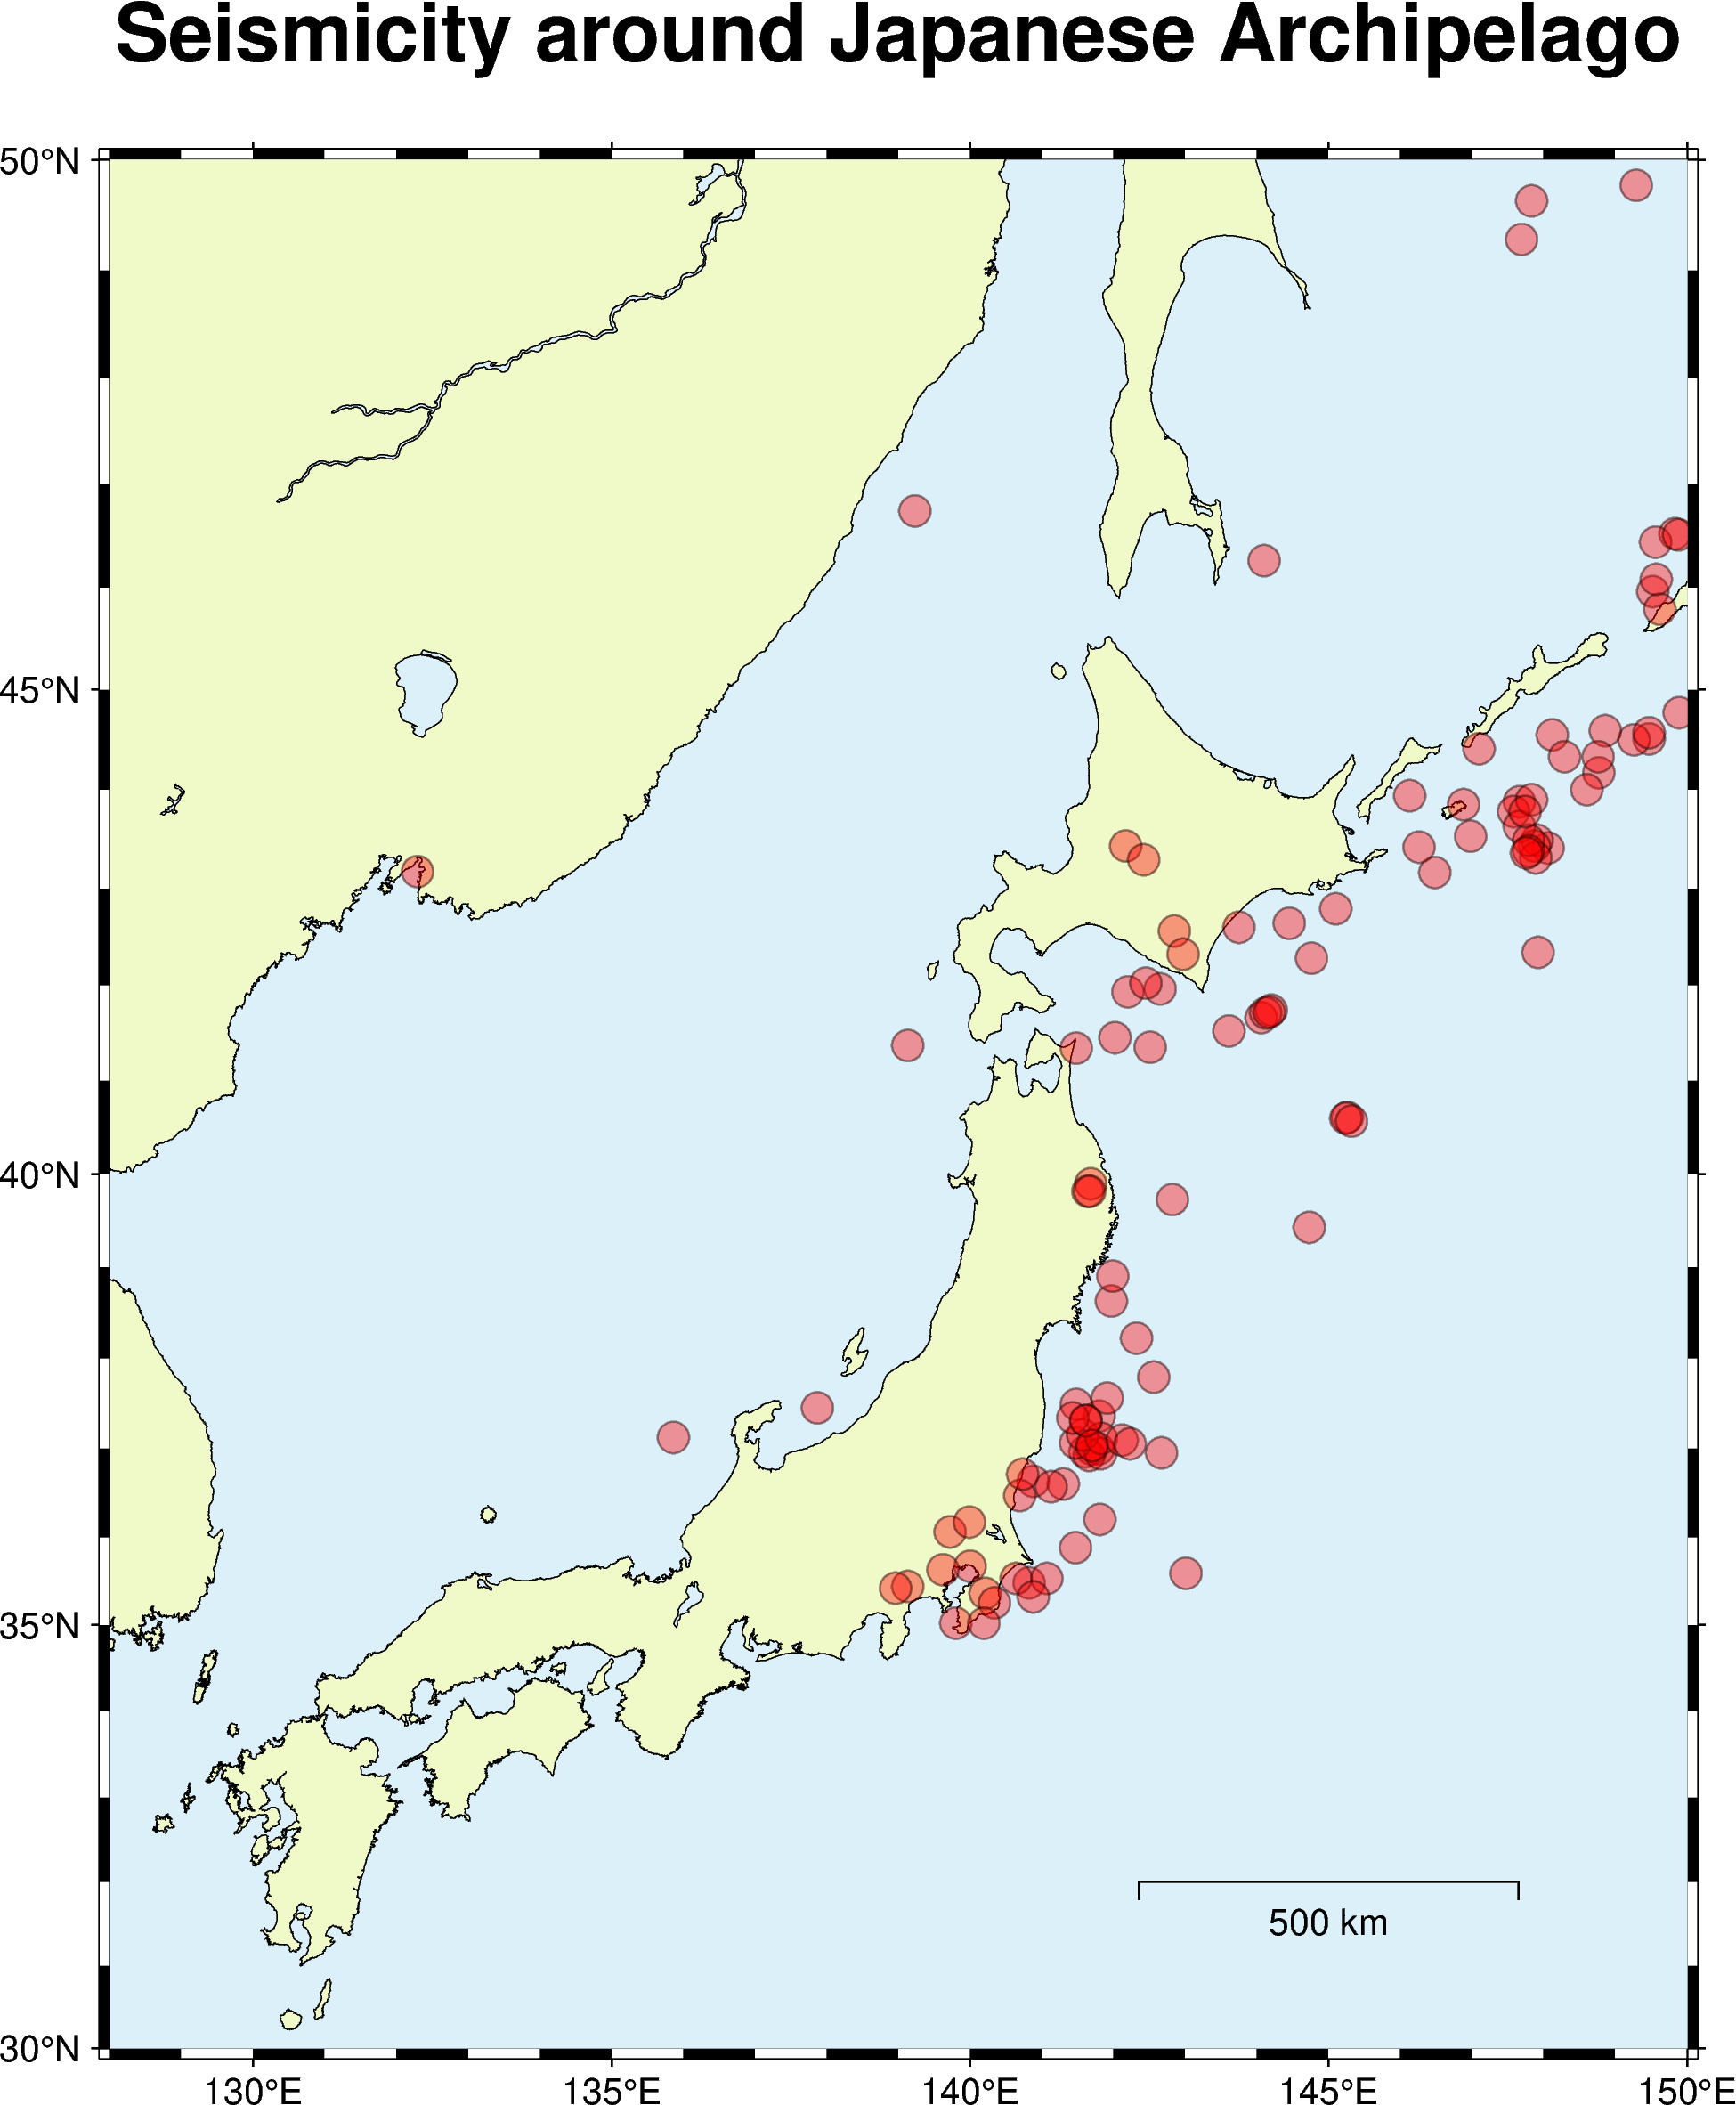

In [106]:
fig = pygmt.Figure()

fig.basemap(
    region = [128,150,30, 50],
    projection = 'M15c', 
    frame = ['WSen+t"Seismicity around Japanese Archipelago"', 'xaf', 'yaf'],
)

fig.coast(
    land        = '240/250/200', 
    water       = '220/240/250', 
    resolution  = 'h', 
    area_thresh = '100', 
    map_scale   = '145/32/32/500',
    shorelines  = 'default,black'
)

# 震央分布のプロット
fig.plot(
    x            = data.longitude,
    y            = data.latitude,
    color        = 'red',            # 塗りつぶし色の指定
    style        = 'c0.3c',          # 固定サイズの場合は (symbol)(size) 指定
    pen          = 'thinner,black', 
    transparency = 60                # コマンド全体に影響する透明度設定
)

fig.show()

新しいコマンド `fig.plot()` では `style` の設定が少々面倒だ．ここでシンボルや（固定サイズの場合は）サイズの指定を行う．シンボルは[GMT公式ドキュメント](https://docs.generic-mapping-tools.org/latest/plot.html)の以下の図の通り：
<img src="https://docs.generic-mapping-tools.org/latest/_images/GMT_base_symbols1.png">

上記の例は直径 0.2cm (`0.2c`）の円をプロットすることを指示している．

その他，`tranparency` オプションでプロットするデータの透明度を指定している．数値が100に近いほど透明に近くなる．`tranparency`オプションの代わりに，色名やRGB値に

```python
color = 'red@60'
```
のように指定する方法もある．この方法だと，たとえば塗りつぶしの色は半透明にするが，`pen`オプションで指定する縁取りの線は不透明にする，というようなこともできる．

```{warning}

`transparency` オプションを `frame` を指定しているコマンドに付与すると，図の枠やラベルが半透明になってしまう．
```

ところで，`fig.plot` には座標系や範囲が明示的に含まれていない．クラシックなGMTでも，従前のコマンドと同じ座標系や領域は `-J` や `-R` のように引数なしのオプションで略記することができたが，pygmtではオプションを与える必要すらない．

### 可変サイズ・可変色プロット

次に，マグニチュードと深さを用いてシンボルの色と大きさを変化させてみる．

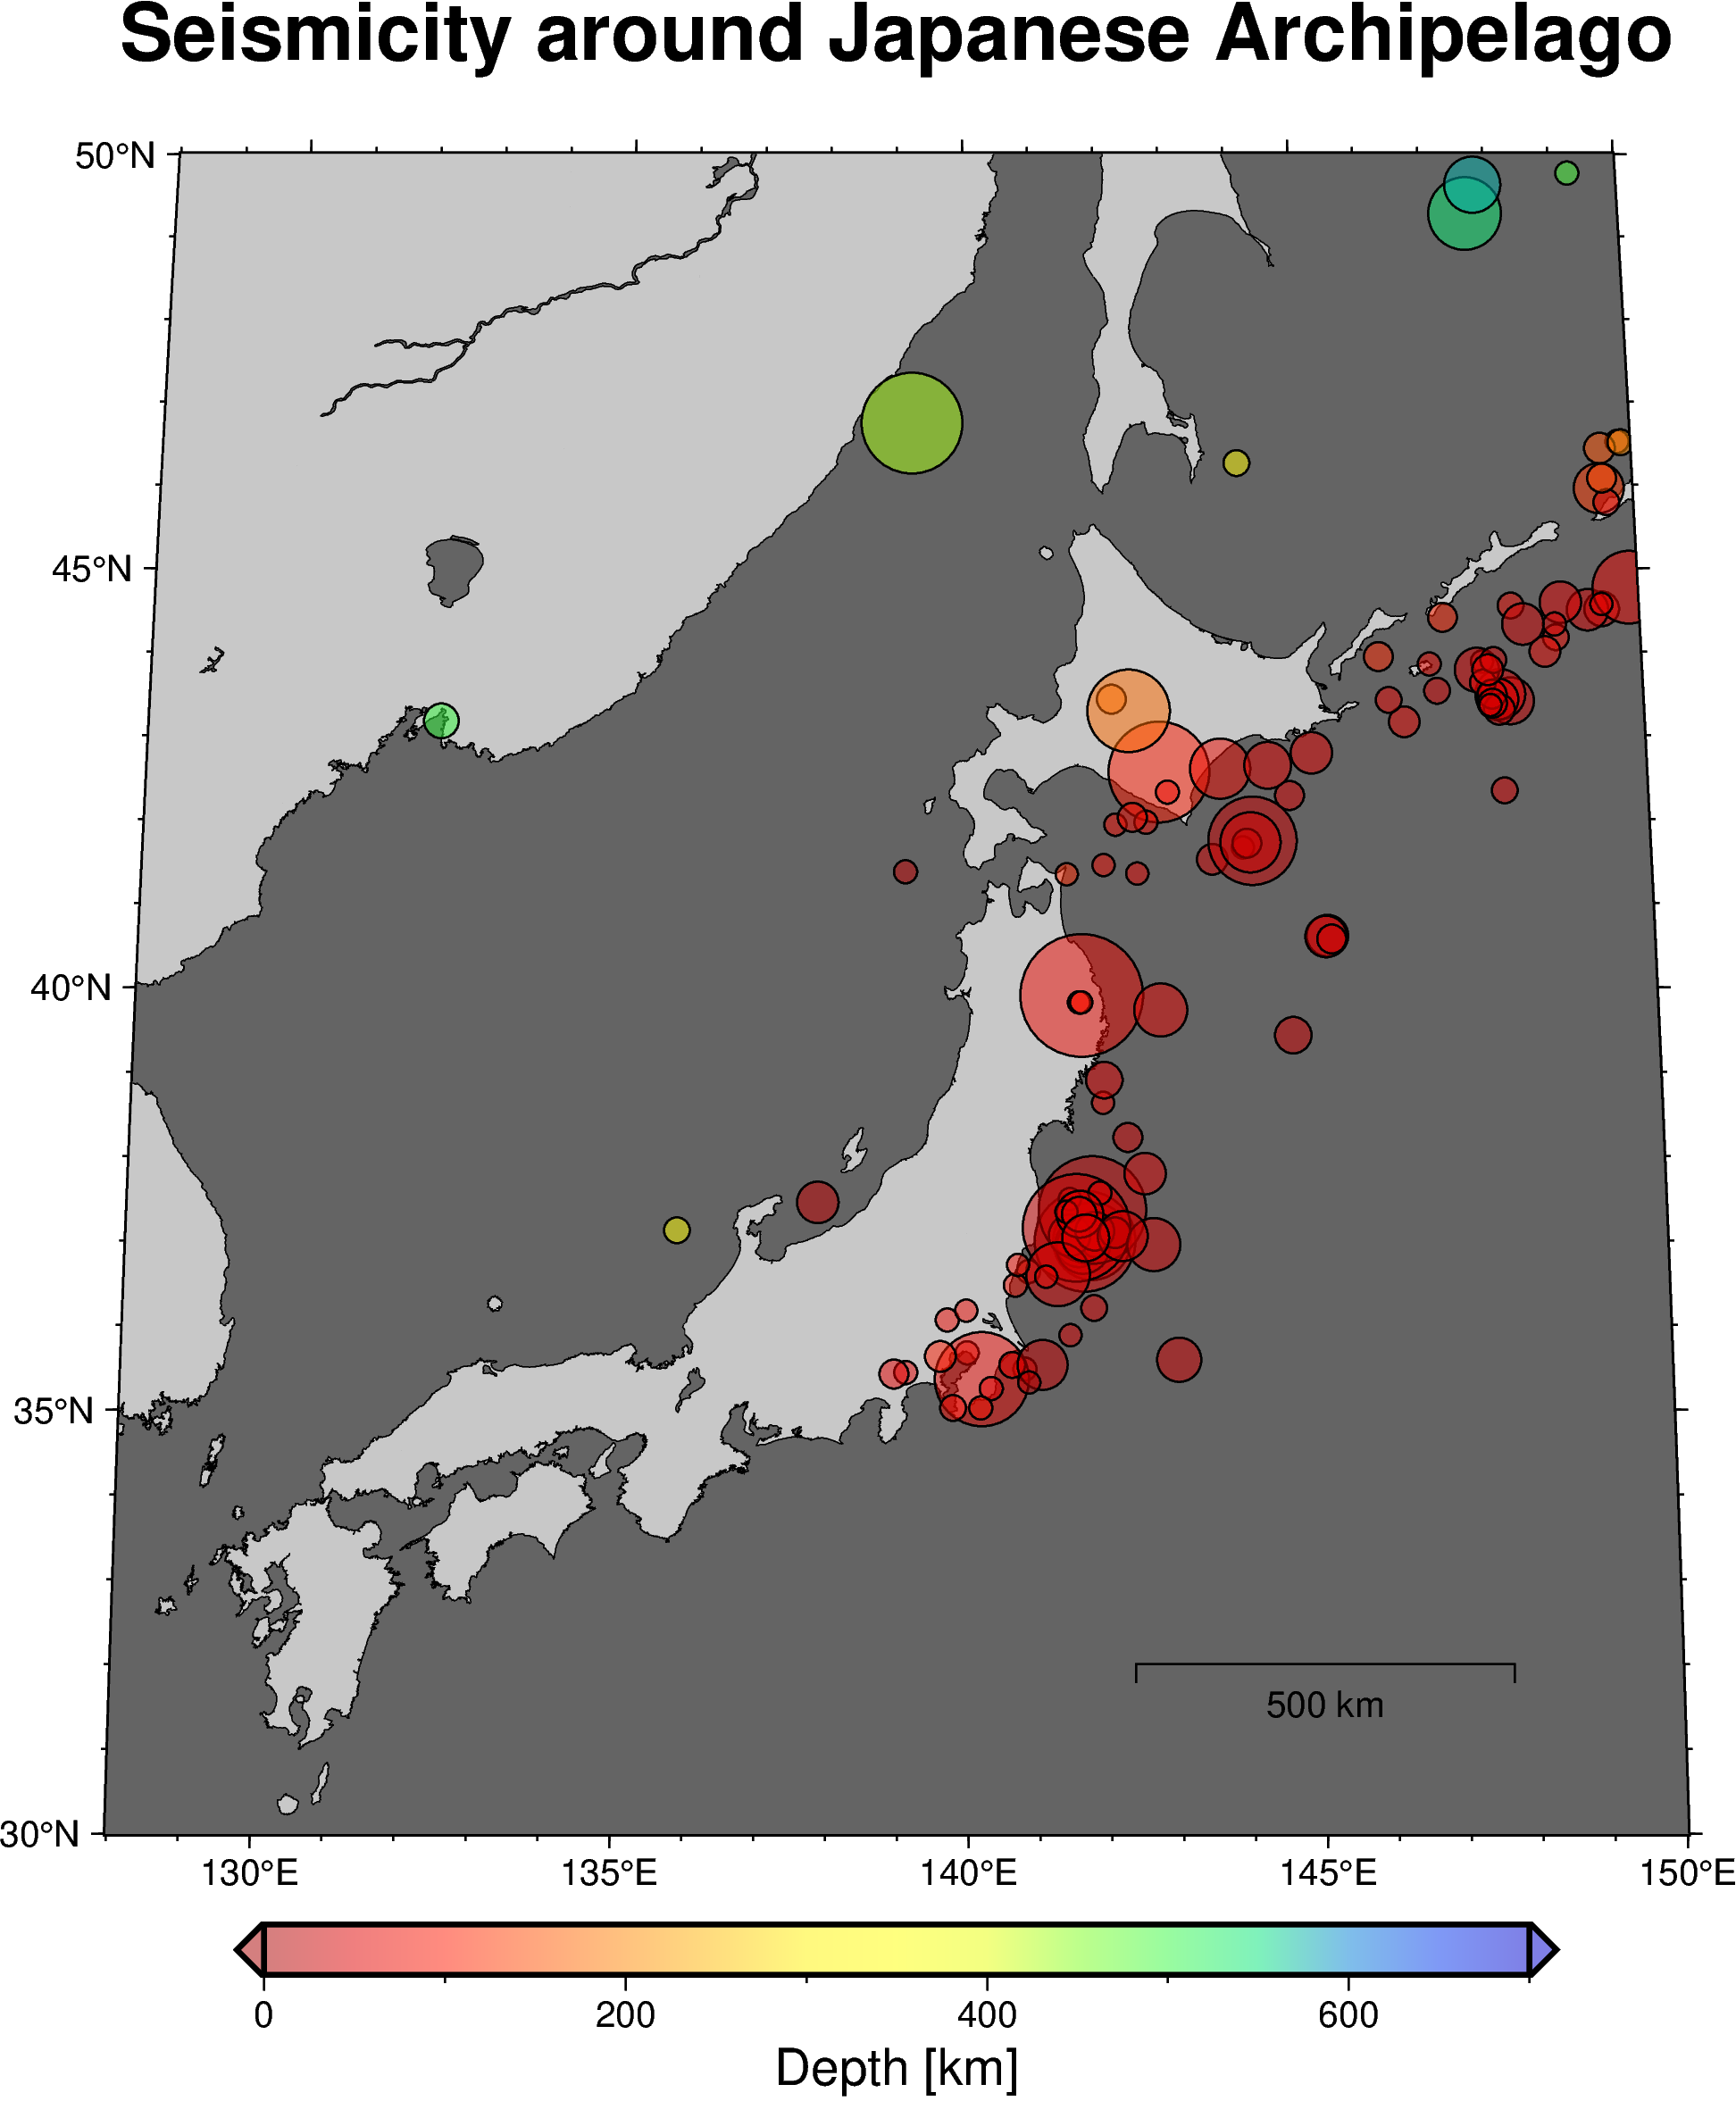

In [181]:
fig = pygmt.Figure()

fig.basemap(
    region = [128,150,30, 50],
    projection = 'N139/15c', 
    frame = ['WSen+t"Seismicity around Japanese Archipelago"', 'xaf', 'yaf']
)

fig.coast(
    land        = '200', 
    water       = '100', 
    resolution  = 'h', 
    area_thresh = '100', 
    map_scale   = '145/32/32/500',
    shorelines  = 'default,black'
)

pygmt.makecpt(
    cmap         = 'seis',        # カラーマップを選択
    series       = [0, 700, 50],  # min/max/increment
    background   = True,          # 値の上限・下限超過データの色を上限値・下限値と等しくする
    continuous   = True, 
    transparency = 50    
)

fig.plot(
    x            = data.longitude,
    y            = data.latitude,
    style        = 'c',         
    pen          = 'thinner,black', 

    size = 0.05 + 0.01 * (2**data.magnitude), # サイズ指定（cm）
    
    cmap  = True,                             # カラーマップ利用
    color = data.depth_km,                    # 深さデータに基づき色を判断
)

fig.colorbar(
    position = '+e',
    frame = ['x+l"Depth [km]"'], 
)


fig.show()

### カラーパレットの扱い

`pygmt.makecpt` でカラーパレットファイルを作成できる．
デフォルトでは，作成したカラーパレットがそのセッションの標準として登録され，それ以降のコマンドでのカラーパレットとして自動的に利用される．

複数のカラーパレットを同時に使い分けたいなど，明示的にカラーパレットを指示したいときには，`pygmt.makecpt`  の `output` オプションでファイル名を指定して `.cpt` ファイルを作成する．

```{tip}
複数のカラーパレットを1枚の画像上の複数の絵にそれぞれ使うのであれば，`fig.subplot()` を用いるほうが便利そうだ．
```

## 地形段彩図の描画

手持ちのNetCDF（`grd` or `nc`）ファイルを描画するのはもちろん，GMT6からはネットワーク越しにグローバルな地形データを取得するコマンドが提供されている．ここではその `pygmt` 実装を用いることにする．

In [89]:
grid_data = pygmt.datasets.load_earth_relief(
    resolution='01m',
    region = [128, 150, 28, 50]
)

`load_earth_relief` のオプションのうち，`region` はこれまでの`pygmt`のオプションと同じく，リストまたはタプルで範囲を与える．範囲を省略した場合はグローバルデータが読み込まれる．

`resolution`は `01d`, `30m`, `20m`, `15m`, `10m`, `06m`, `05m`, `04m`, `03m`, `02m`, `01m`, `30s`, `15s`, `03s`, `01s` から選ぶ．つまり1秒角から1度まで選択できる．

ダウンロードされるデータはSRTM（Shuttle Rader Topography Mission）で，解像度によりデータソースが異なる．また，1秒と3秒グリッドには海底地形データが存在しないため，15秒データから補間される．データは `~/.gmt/` 以下にキャッシュされる．あまり細かいグリッドで広域のデータを読み込むとダウンロードにもプロットにも時間がかかるので注意．

段彩図をより見栄え良くするには，`grdgradient`による傾斜データの作成と利用が有効だ．

In [90]:
gradient_data = pygmt.grdgradient(
    grid = griddata,
    azimuth = [45, 135], 
    normalize = 'e0.7'
)

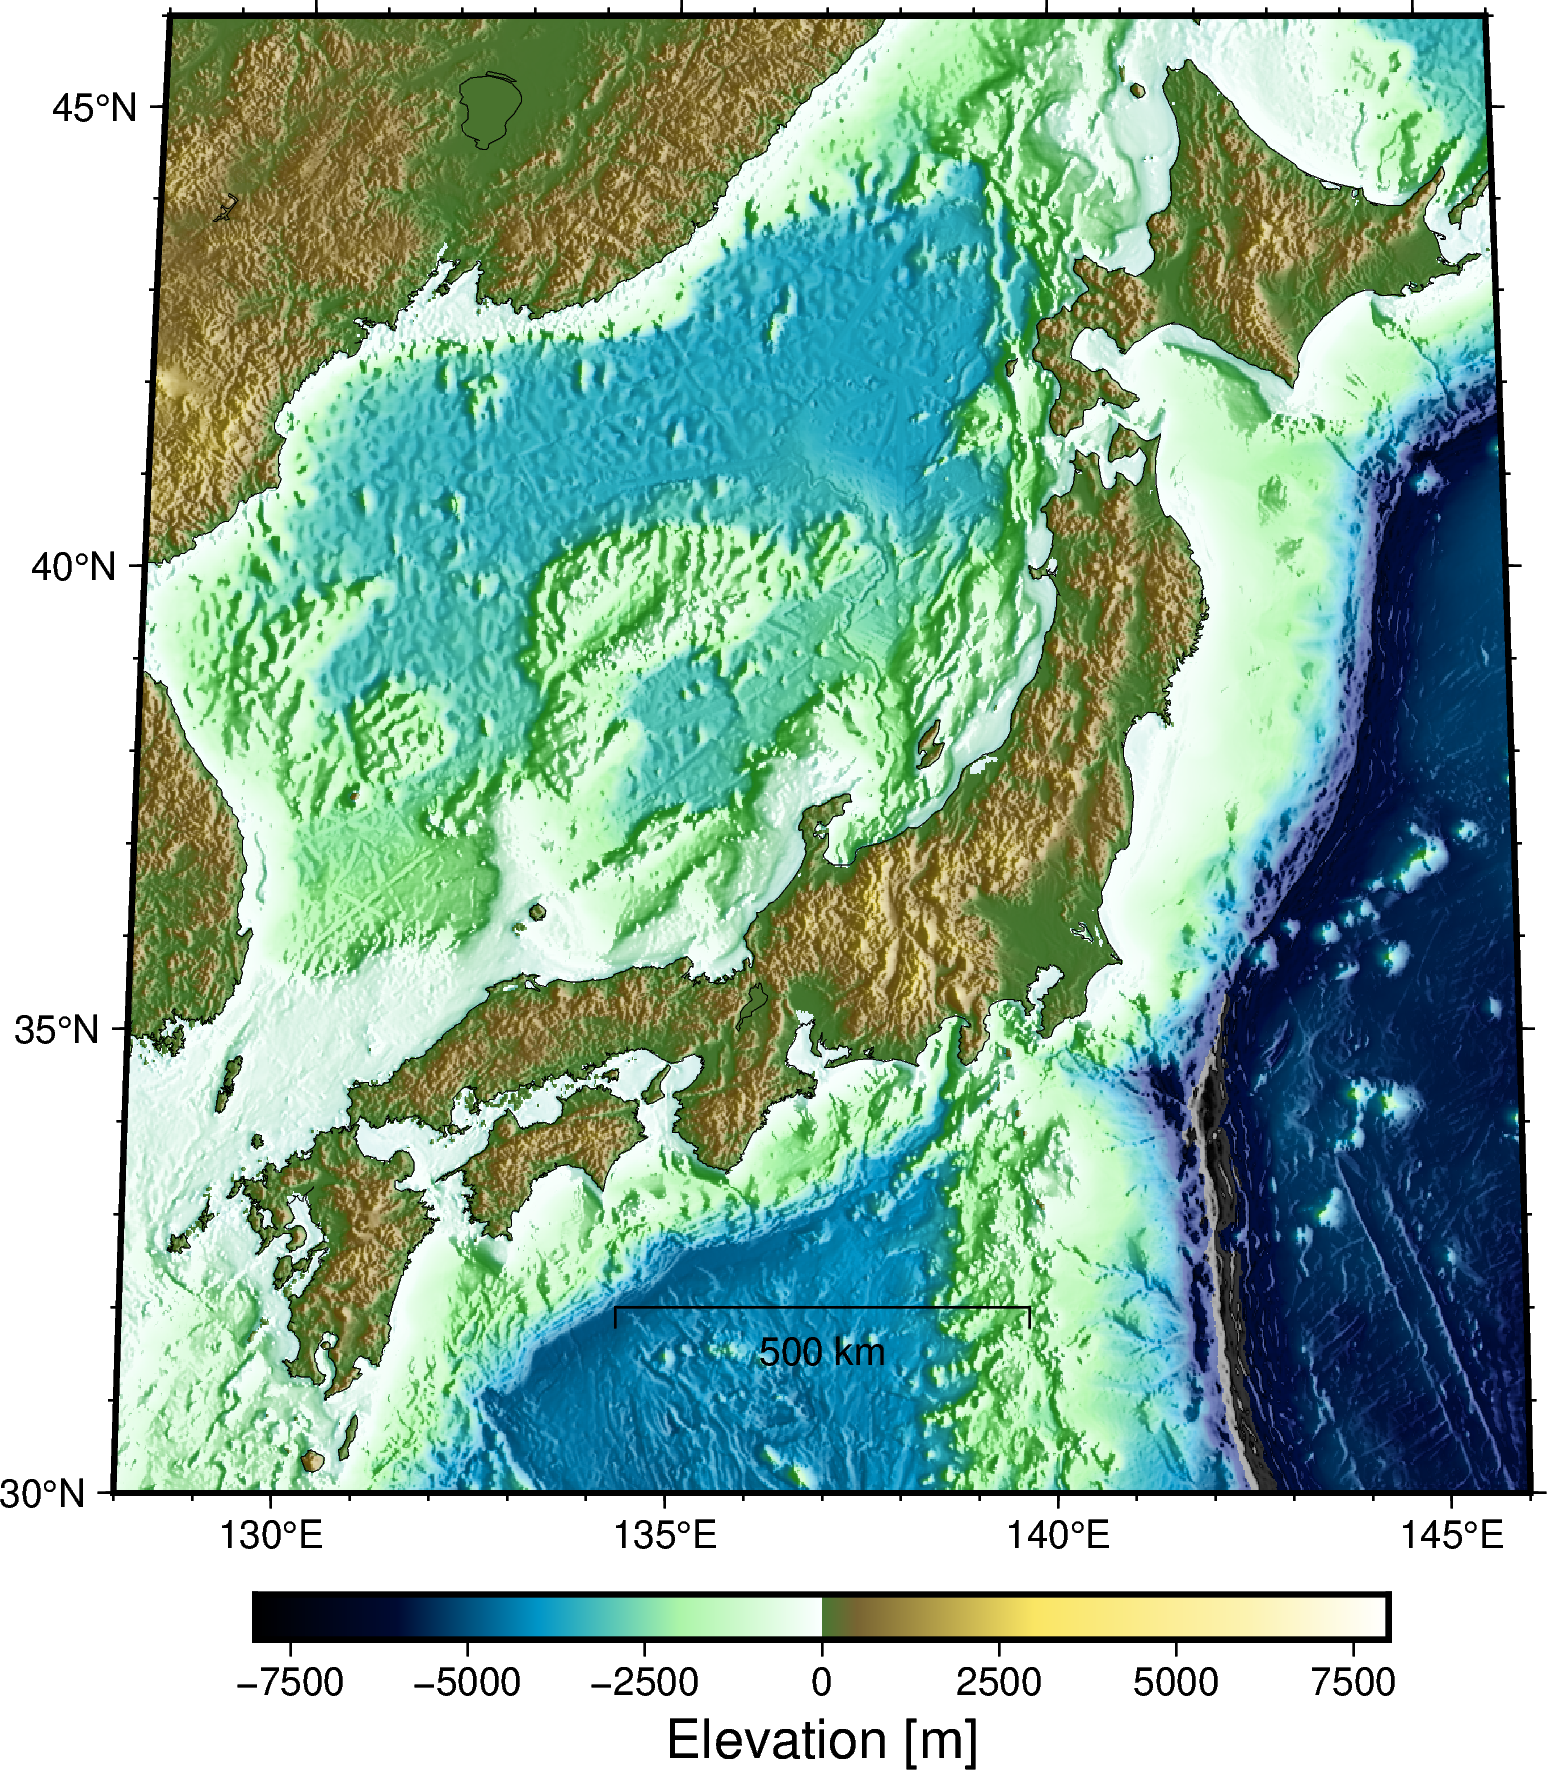

In [183]:
fig = pygmt.Figure()

pygmt.makecpt(
    cmap = 'relief', 
)

fig.grdimage(
    projection = 'N138/12c', 
    region     = [128, 146, 30, 46], 
    grid       = grid_data, 
    shading    = gradient_data
)

fig.coast(
    area_thresh = '100', 
    map_scale   = '137/32/32/500',
    shorelines  = 'faint,black',
    frame       = ['WSen', 'xaf', 'yaf']
)

fig.colorbar(
    frame = ['a2500', 'x+l"Elevation [m]"']
)

fig.show()

## GRDデータの扱い

To be available soon ... ?

## GMTの微調整

GMTは `gmt defaults` コマンドでさまざまな調整を行うことができる．

## Obspyとの連携

例として，SAC (Seismic Analysis Code) に含まれている地震波形例をファイルとして保存し，それをObsPyから読み込んでみよう．SACでは以下のようなコマンドを実行する．

```bash
$ sac
 SEISMIC ANALYSIS CODE [10/13/2020 (Version 101.6a)]
 Copyright 1995 Regents of the University of California

SAC> funcgen seismogram
SAC> w dat/example.sac
SAC> quit
```

ObsPy で読み込むには `obspy.core.read` ．任意個数の地震波形を読み込む stream 形式に波形が格納される．今回は1波形だけなので，その最初のリスト成分を `trace0` として抽出した．

In [205]:
trace = obspy.core.read('./dat/example.sac')
trace0 = trace[0]

波形に付随するメソッドの `plot` を使うだけで適当にプロットしてくれる．

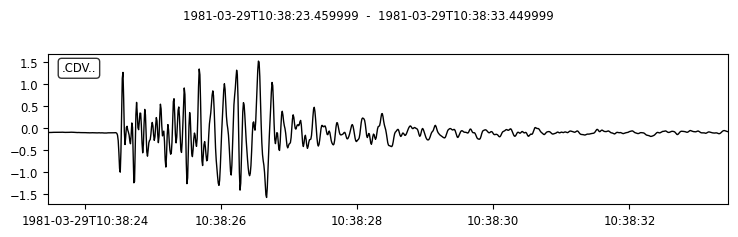

In [209]:
p = trace0.plot()

この中には `stats` に様々なヘッダ情報が含まれる．今回はSAC形式から読み込まれているので，`sac`という辞書にそのヘッダが格納されている．

In [211]:
print(trace0.stats)

         network: 
         station: CDV
        location: 
         channel: 
       starttime: 1981-03-29T10:38:23.459999Z
         endtime: 1981-03-29T10:38:33.449999Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 1000
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.0099999998, 'depmin': -1.56928, 'depmax': 1.52064, 'b': 9.4599991, 'e': 19.449999, 'o': -41.43, 'a': 10.464, 'stla': 48.0, 'stlo': -120.0, 'evla': 48.0, 'evlo': -125.0, 'evdp': 15.0, 'dist': 373.06274, 'az': 88.147209, 'baz': 271.85278, 'gcarc': 3.3574646, 'depmen': -0.098547176, 'cmpaz': 0.0, 'cmpinc': 0.0, 'nzyear': 1981, 'nzjday': 88, 'nzhour': 10, 'nzmin': 38, 'nzsec': 14, 'nzmsec': 0, 'nvhdr': 6, 'norid': 0, 'nevid': 0, 'npts': 1000, 'iftype': 1, 'idep': 50, 'iztype': 9, 'ievtyp': 42, 'leven': 1, 'lpspol': 1, 'lovrok': 1, 'lcalda': 1, 'unused23': 0, 'kstnm': 'CDV', 'kevnm': 'K8108838'})


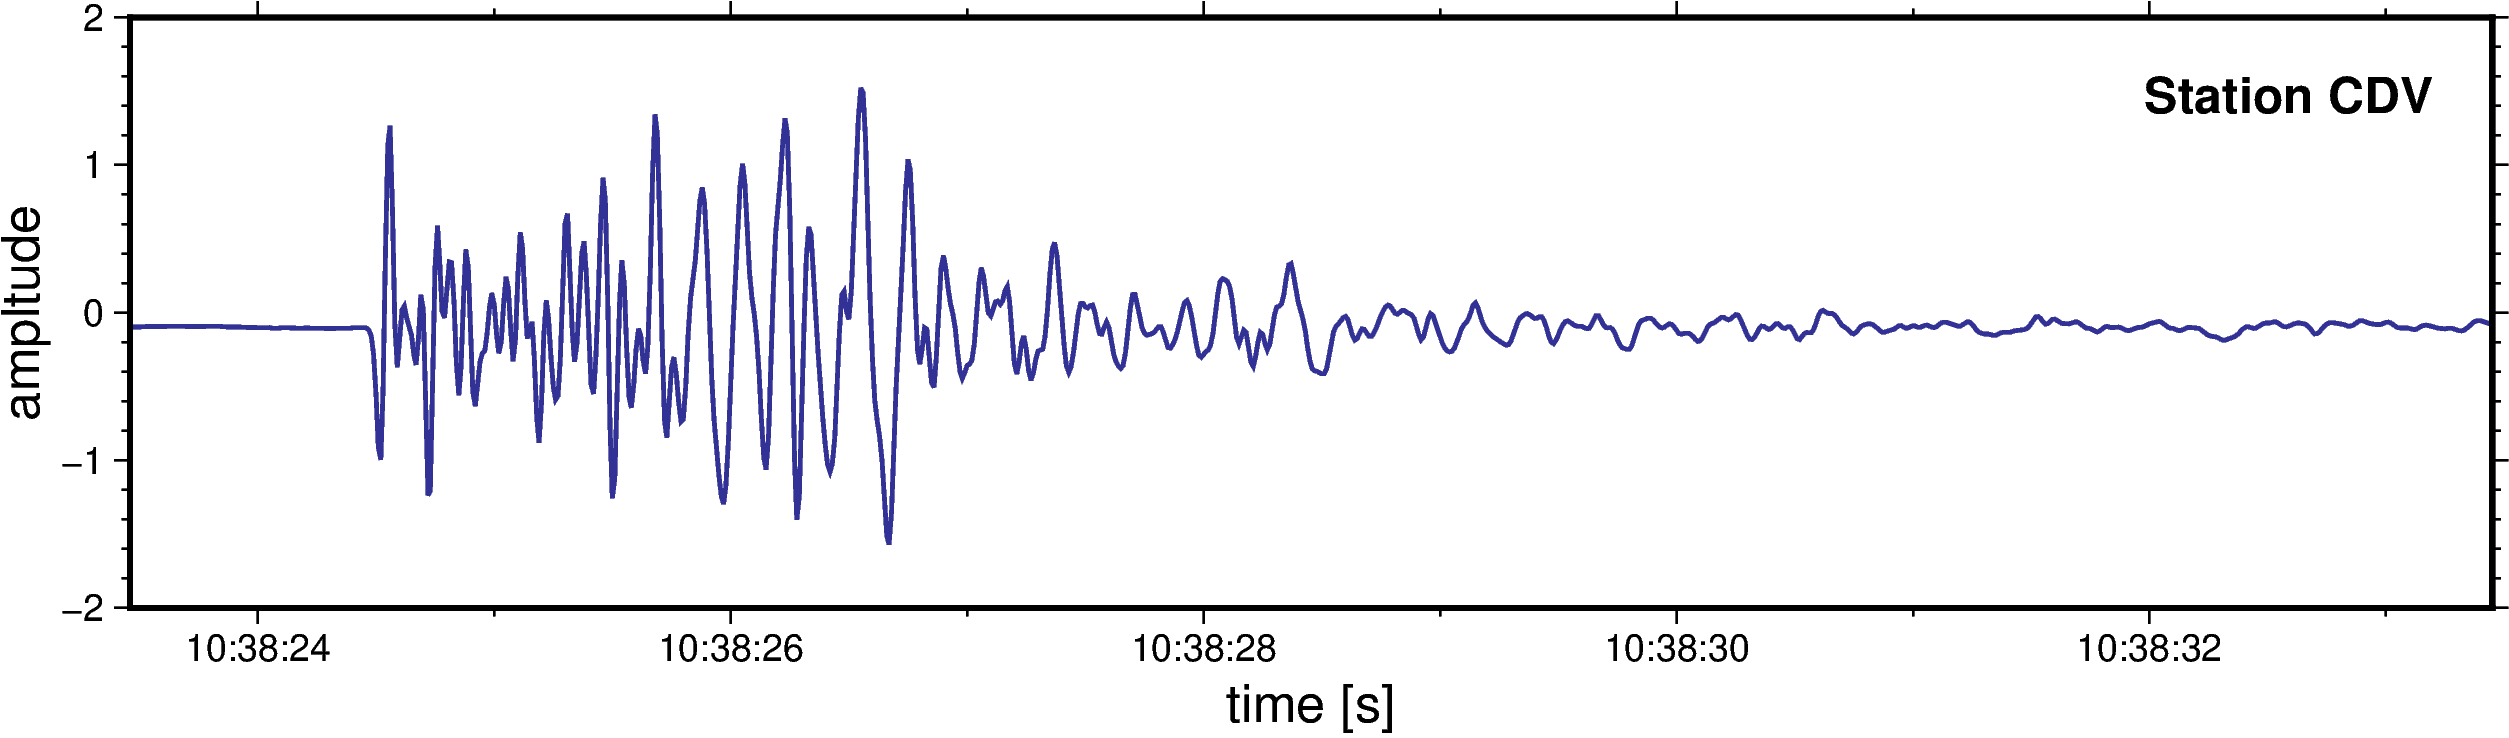

In [243]:
fig = pygmt.Figure()

fig.plot(
    projection = 'X20c/5c',
    region = [trace0.stats.starttime, trace0.stats.endtime, -2, 2],
    x = trace0.times("timestamp"), 
    y = trace0.data,
    pen = 'thick,50/50/150'
)

fig.text(
    text = "Station " + trace0.stats.station, 
    position = 'RT', 
    offset = 'j0.5c/0.5c',
    font = '12p,Helvetica-Bold,Black'
)

fig.basemap(
    frame  = ['WSen', 'xaf+l"time [s]"', 'yaf+l"ampltude"' ],
)

fig.show()

In [241]:
trace0.stats.starttime.ctime()

'Sun Mar 29 10:38:23 1981'